# **CI Course - EX9**

--------

--------


## Theory Overview ##

**What is pytorch?**

PyTorch is a popular open-source machine learning library used for building and training deep learning models. It is based on the Torch library and provides a flexible and efficient framework for creating neural networks. Torch is based on tesnsors as its data structure.

**What is tensors??**

In simple terms, tensors are mathematical objects that are similar to arrays or matrices. They are fundamental data structures used in PyTorch for representing and manipulating data.

Why we don't use numpy arrays and thats it???

Pytorch tensors are similar to numpy arrays, but **can also be operated on GPU**. Numpy arrays are mainly used in typical machine learning algorithms (such as algorthms and classical ML from last exersices) whereas **pytorch tensors are mainly used in deep learning** which requires heavy matrix computation.

---

### Exercise 1 - Digits classification (EX7) using pytorch ###

In this exercise we will solve the digits classification from exercise 7 using pytorch tools and framework.

**Brief reminder:**

Input: 1797 samples of 8X8 pixels digits (0-9) images. Each pixel, store an integer between 0-15 determining the greyscale level of the pixel.

Output: The label of the iamge -> the digit presented in the image.

- For more information on the task please see exercise 7.

---


### Solution ###

Solution flow:
1. Load and pre-process
2. Build the model
3. Set optimizer, loss-function and hyperparameters
4. Training loop and learning curves
5. Evaluate

---

#### Load and pre-process ####

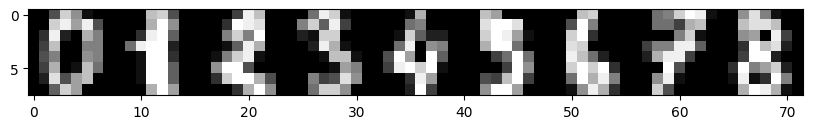

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## welcome torch!
import torch
import torch.nn as nn
import torch.optim as optim

##################################################################
### Load and perpare data ###
data = load_digits()

# Show example of 10 images from the dataset
plt.figure(figsize=(10,5))
plt.gray()
I = data.images[0]
for i in range(1,9):
    I = np.concatenate((I, data.images[i]), axis = 1)
plt.imshow(I)
plt.show()

**Pre-process steps:**
- Flatten the 8X8 to a 1X64 np.array --> so it can be an input of fully-connected net.
- Normalize --> For better learning process during training.
- Split to train and test.

For more information on the pre-process stage -> please see ex7.

In [2]:
# Flatten the 8x8 image to a vector of length 64
X, y = [], np.array(data.target)
for x in data.images:
    x = x.reshape((-1,))
    X.append(x)
X = np.array(X)

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Store the data in a tensors data structure using ```torch.tensor()``` and set the data type stored in the tensor by using ```torch.<type_name>```

In [3]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

print(f"X_train[0] tensor is: {X_train[0]} | y_train[0] tensor is: {y_train[0]}")
print("")
print(f"X_train tensor shape is: {X_train.shape} | y_train tensor shape is: {y_train.shape}")

X_train[0] tensor is: tensor([ 0.0000, -0.3350, -0.2535, -0.4322, -0.1979, -0.3145, -0.4097, -0.1250,
        -0.0591, -0.3110,  0.1140,  1.0111,  1.1964,  0.9625, -0.5150, -0.1304,
        -0.0446,  0.3911,  1.0717,  1.5527,  1.4419,  0.6769, -0.5488, -0.1142,
        -0.0334,  0.4865,  1.1161,  1.2206,  0.9874, -0.0939, -0.6289, -0.0472,
         0.0000,  0.4772,  1.3179,  1.1056,  0.9606, -0.1268, -0.8227,  0.0000,
        -0.0613,  0.8106,  1.3951,  1.3622,  1.3308, -0.2172, -0.7983, -0.0887,
        -0.0354,  1.3150,  1.3279,  1.2364,  1.2421,  0.5376, -0.7574, -0.2098,
        -0.0236, -0.2991, -0.1093, -0.0204,  0.0387,  0.8876, -0.2611, -0.1960]) | y_train[0] tensor is: 1

X_train tensor shape is: torch.Size([1527, 64]) | y_train tensor shape is: torch.Size([1527])


#### Build the model ####

In this exersice we will use a fully-connected net with **3 layers** combining the **Relu** activation function after each linear layer, and a **softmax** activation function at the output layer.

Reminder --> Relu:

![Relu.png](attachment:90333058-d391-40b3-a16a-f13f2ea34827.png)

Reminder --> SoftMax:

![softmax.jpg](attachment:bdef3225-80ee-4a4f-8772-6e8c5132876e.jpg)

For neuaral-networks implemantations we will use the ```torch.nn``` module that provides a set of classes and functions for creating and training neural networks.

In [4]:
# The nn.Module class is a more flexible way to define a model. It allows you to define a model with any arbitrary structure, including multiple branches and loops.
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(64, 32)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x): # We don't really need so 3 layers, but for the example.
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

model = Net()
print(model)

Net(
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


#### Set optimizer, loss-function and hyperparamters ####

**Loss function - Cross entropy (CRE) - reminder**:

$$
\text{CRE} = -\sum_{i=1}^{C} y_i \log(p_i)
$$

In this equation, C represents the total number of classes or categories, y_i represents the true label or target value for class i, and p_i represents the predicted probability for class i.


**Optimizer - Adam (Adaptive Moment)**:

The optimizer is an algorithm used to adjust the model weights progressively to produce a better output. There are many types of optimizers to choose.

During training, Adam calculates an adaptive learning rate for each parameter by taking into account both the current gradient and the historical information. It then updates the parameters by multiplying the learning rate with the gradient. This adaptive learning rate helps in handling different scales of gradients and makes the optimization process more efficient.



In [5]:
### Preparare for Training ###

loss_fn = nn.CrossEntropyLoss()

# model.parameters() are the weights of the defined model that Adam will optimize.
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 130
batch_size = 100

#### Training loop and learning curve ####

For training we will implement a common training loop framework in pytorch.

Important methods:

```optimizer.zero_grad()```: This line is responsible for zeroing out the gradients before running the backward pass. Gradients are computed during the backward pass and accumulated in the model's parameters. By zeroing the gradients before each iteration, we ensure that the gradients are fresh and not accumulated from previous iterations.

```loss.backward()```: This line computes the gradient of the loss with respect to all the learnable parameters of the model. In other words, it calculates how each parameter should be adjusted to minimize the loss.

```optimizer.step()```: This line updates the weights or parameters of the model based on the computed gradients. The optimizer uses the gradients to determine the direction and magnitude of the parameter updates, typically using an optimization algorithm such as stochastic gradient descent (SGD) or Adam.

```model.train()```: Make sure gradient tracking is on, and do a pass over the data (don't need it if ```model.evaluate()``` doesn't in use).

0 - Finished epoch: 0, latest loss: 2.2992100715637207, test loss: 2.295299768447876
1 - Finished epoch: 1, latest loss: 2.284048080444336, test loss: 2.278083562850952
2 - Finished epoch: 2, latest loss: 2.2504611015319824, test loss: 2.2379403114318848
3 - Finished epoch: 3, latest loss: 2.178774356842041, test loss: 2.1538877487182617
4 - Finished epoch: 4, latest loss: 2.075744867324829, test loss: 2.047743558883667
5 - Finished epoch: 5, latest loss: 1.9652831554412842, test loss: 1.944254994392395
6 - Finished epoch: 6, latest loss: 1.857359766960144, test loss: 1.84565269947052
7 - Finished epoch: 7, latest loss: 1.7738075256347656, test loss: 1.7728171348571777
8 - Finished epoch: 8, latest loss: 1.7271227836608887, test loss: 1.7262722253799438
9 - Finished epoch: 9, latest loss: 1.699511170387268, test loss: 1.6968263387680054
10 - Finished epoch: 10, latest loss: 1.676956057548523, test loss: 1.6766923666000366
11 - Finished epoch: 11, latest loss: 1.6564980745315552, test l

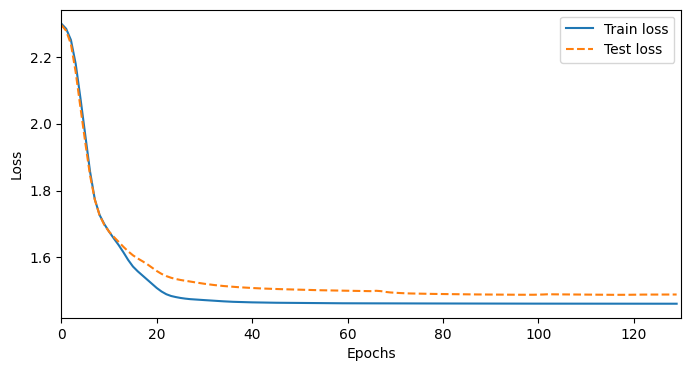

In [6]:
### Train ###
L, L_test = [], [] # Record losses
for epoch in range(epochs):
    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    for i in range(0, len(X_train), batch_size):
        Xbatch = X_train[i:i+batch_size,:]
        y_pred = model(Xbatch) # Feed-forward
        ybatch = y_train[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch) # Evaluate loss
        optimizer.zero_grad() # Zero the gradients before running the backward pass. This is because by default, gradients are accumulated in buffers ( i.e, not overwritten)
        loss.backward() # Compute gradient of the loss with respect to all the learnable parameters of the model
        optimizer.step() # Update weights

    L_test.append(loss_fn(model(X_test), y_test).detach().numpy())

    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.
    model.eval()
    # Disable gradient computation and reduce memory consumption.
    with torch.no_grad():
        L.append(loss.detach().numpy())

    print(f'{epoch} - Finished epoch: {epoch}, latest loss: {loss}, test loss: {L_test[-1]}')

plt.figure(figsize=(8,4))
plt.plot(np.arange(0, epochs), L, label='Train loss')
plt.plot(np.arange(0, epochs), L_test, '--', label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([0,epochs])
plt.legend()
plt.show()

#### Evaluate ####

With pytorch during evaluation it is really important to set the model in evaluation mode by using ```model.eval()```. When the model is in evaluation mode, it affects the behavior of certain layers or modules in the model, such as dropout and batch normalization, this means that the model will produce the same output for the same input data, allowing for reproducibility and consistent evaluation results.

In addition, it is very common to use ```torch.no_grad()``` during evaluation.
When used, it prevents PyTorch from tracking the operations and creating computational graphs. This has two main benefits: it reduces memory consumption and speeds up the computations.


In [7]:
### Evaluate the model ###
model.eval()

correct = 0
with torch.no_grad():
    for x, y in zip(X_test, y_test):
        output = model(x.reshape(1,-1))
        _, predicted = output.max(1)
        correct += (predicted == y).sum().item()

# Print the accuracy
accuracy = correct / X_test.shape[0] * 100
print('Classification success rate: {}%'.format(accuracy))


Classification success rate: 97.4074074074074%


----

### Exercise 2 - Fuel consumption regression (EX8) using pytorch ###

In this exercise we are going to solve the fuel consumption prediction from exercise 8 using pytorch tools and framework.

**Brief reminder:**

Input: **399 data samples** of **4 features** of cars.

Output: **Fuel consumption** (km/l)

---

### Solution ###

Solution flow:
1. Load and pre-process
2. Build the model
3. Set optimizer, loss-function and hyperparamters
4. Training loop and learning curves
5. Evaluate

---

#### Load and pre-process ####

- Same process as we did in the exercise above.

In [8]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pickle
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

##################################################################
### Load and perpare data ###

# training data
with open('auto_kml.pkl', 'rb') as H:
    data = pickle.load(H)

# Input: Features of various cars
# 0. displacement
# 1. Number of cylinders
# 1. horsepower
# 2. weight
# Output: Fuel consumption (km/l)

X = data['features']
Y = data['kml'].reshape(-1,1)
D = np.concatenate((X,Y), axis=1)
scaler = StandardScaler()
scaler.fit(D)
D = scaler.transform(D)

X_train, X_test, y_train, y_test = train_test_split(D[:,:-1], D[:,-1], test_size=0.15, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

print(f"X_train[0] tensor is: {X_train[0]} | y_train[0] tensor is: {y_train[0]}")
print("")
print(f"X_train tensor shape is: {X_train.shape} | y_train tensor shape is: {y_train.shape}")

FileNotFoundError: ignored

#### Build the model ####

In this exersice we will use a fully-connected net with **3 layers** combining the **Tanh** activation function after each linear layer.

For more information about **Tanh** please see exercise 8.

We will create a Net class with a different approach for constructing layers. Instead of manually defining each layer, we will use the `nn.Sequential()` function to structure the layers in a sequential manner.

In [ ]:
# The nn.Module class is a more flexible way to define a model. It allows you to define a model with any arbitrary structure, including multiple branches and loops.
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.regressor = nn.Sequential(
                            nn.Linear(X_train.shape[1], 3),
                            nn.Tanh(),
                            nn.Linear(3, 3),
                            nn.Tanh(),
                            nn.Linear(3, 1),
                            nn.Tanh())

    def forward(self, x): # We don't really need so 3 layers, but for the example.
        x = self.regressor(x)
        return x

model = Net()

print(model)

#### Set optimizer, loss-function and hyperparamters ####

**Loss function - Mean Squared Error (MSE) - reminder**:

$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \bar{y}_i)^2$$

It measures the average squared difference between the predicted and actual values1.




In this equation, C represents the total number of classes or categories, y_i represents the true label or target value for class i, and p_i represents the predicted probability for class i.


**Optimizer - Adam --> please see exersice above.**


In [ ]:
### Preparare for Training ###

loss_fn = nn.MSELoss()  # Mean Square Error

# model.parameters() are the weights of the defined model that Adam will optimize.
optimizer = optim.Adam(model.parameters(), lr=0.001) # <- Include learning rate (lr)

epochs = 300
batch_size = 100

#### Training loop and learning curve ####

We will use exactly the same loop as we executed in the exercise above.

In [ ]:
### Train ###
L, L_test = [], [] # Record losses
for epoch in range(epochs):
    model.train(True)
    for i in range(0, len(X_train), batch_size):
        Xbatch = X_train[i:i+batch_size,:]
        y_pred = model(Xbatch) # Feed-forward
        ybatch = y_train[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch) # Evaluate loss
        optimizer.zero_grad() # Zero the gradients before running the backward pass. This is because by default, gradients are accumulated in buffers ( i.e, not overwritten)
        loss.backward() # Compute gradient of the loss with respect to all the learnable parameters of the model
        optimizer.step() # Update weights

    L.append(loss.detach().numpy())
    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.
    model.eval()
    # Disable gradient computation and reduce memory consumption.
    with torch.no_grad():

        L_test.append(loss_fn(model(X_test), y_test).detach().numpy())

    print(f'{epoch} - Finished epoch: {epoch}, latest loss: {loss}, test loss: {L_test[-1]}')

plt.figure(figsize=(8,4))
plt.plot(np.arange(0, epochs), L, label='Train loss')
plt.plot(np.arange(0, epochs), L_test, label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([0,epochs])
plt.legend()
plt.show()

#### Evaluate ####

Exactly as we did last time.

In [ ]:
### Evaluate the model ###
model.eval()

x_query = X_test[5,:]
with torch.no_grad():
    #for sample
    prediction = model(x_query)
    #for a batch
    y_pred = model(X_test[:30,:])


d = np.concatenate((x_query.detach().numpy(), y_test[5].detach().numpy()), axis=0)
d = d.reshape(1,-1)
d = scaler.inverse_transform(d)
print('For query sample: ', d[0][:4], ' and label: ', d[0][-1])

d = np.concatenate((x_query.detach().numpy(), prediction.detach().numpy()), axis=0)
d = d.reshape(1,-1)
d = scaler.inverse_transform(d)
print('Prediction for query is: ', d[0][-1])

print(f"Predictions of batch are: {y_pred}")

----

## Summary ##

In this exersice we covered:

1. ANN - classification task using pytorch.
2. ANN - regression task using pytorch.

---

## Helpful and extra links ##

1. [Pytroch - official website](https://pytorch.org/)
2. [Pytorch tutorials](https://www.youtube.com/watch?v=exaWOE8jvy8&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=2)
3. [Another pytorch tutorials](https://www.youtube.com/watch?v=x9JiIFvlUwk&list=PLhhyoLH6IjfxeoooqP9rhU3HJIAVAJ3Vz&index=2)
---